In [2]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function

/home/user1/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df_match = pd.read_csv('dataset.csv')
all_match_attributes=df_match.columns.values.tolist()
after_match_attributes =['home_team_goal', 'away_team_goal', 'possession_home', 'shoton_home', 'shoton_away', 
                      'shotoff_home', 'shotoff_away', 'corner_home', 'corner_away', 'cross_home', 'cross_away', 
                      'foulcommit_home', 'foulcommit_away', 'rcard_home', 'rcard_away', 'ycard_home', 'ycard_away', 
                      'throwin_home', 'throwin_away']
before_match_attributes = list(set(all_match_attributes) - set(after_match_attributes))
before_match_all=before_match_attributes+['possession_home']
df_before_match = df_match[before_match_all]

In [4]:
holdout_per=0.2
df_before_match_out_sample = df_before_match.sample(frac=holdout_per)
df_before_match_out_testtarget = df_before_match_out_sample['possession_home']
df_before_match_out_test =df_before_match_out_sample[before_match_attributes]

df_before_match_out_left = df_before_match.iloc[list(set(df_before_match.index.values.tolist())-set(df_before_match_out_sample.index.values.tolist()))]
df_before_match_out_training = df_before_match_out_left[before_match_attributes]
df_before_match_out_trainingtarget = df_before_match_out_left['possession_home']

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.5s finished

[2017-10-31 16:08:57] Features: 1/41 -- score: -59.7878384992[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished

[2017-10-31 16:08:57] Features: 2/41 -- score: -53.9626220895[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.6s finished

[2017-10-31 16:08:58] Features: 3/41 -- score: -52.8657032796[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.4s finished

[2017-10-31 16:08:58] Features: 4/41 -- score: -51.739269655[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.5s finished

[2

[2017-10-31 16:09:17] Features: 39/41 -- score: -52.0540276095[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2017-10-31 16:09:17] Features: 40/41 -- score: -52.2359442449[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2017-10-31 16:09:17] Features: 41/41 -- score: -52.8551173053

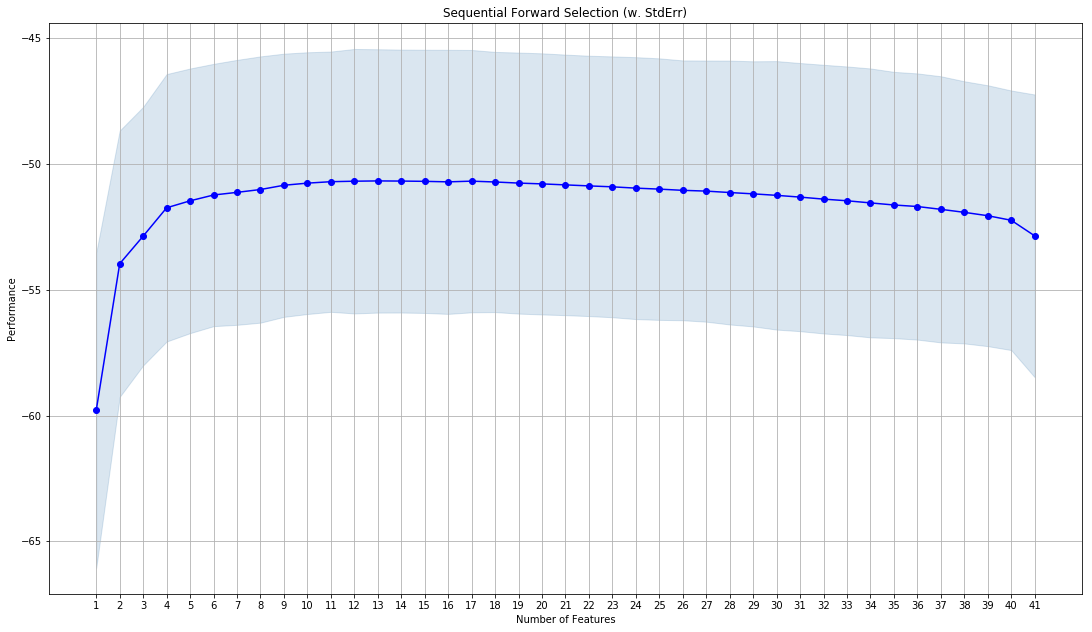

In [5]:
lr = linear_model.LinearRegression()
sfs_greedy = SFS(lr, 
           k_features=df_before_match_out_training.shape[1], 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)
sfs_greedy = sfs_greedy.fit(df_before_match_out_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
fig = plot_sfs(sfs_greedy.get_metric_dict(), kind='std_err')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [6]:
df_features_forward_greedy = pd.DataFrame.from_dict(sfs_greedy.get_metric_dict()).T
df_features_forward_greedy

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-59.7878,13.9674,"[-43.9259306582, -33.1537618454, -43.615903323...","(33,)",18.8059,6.26863
2,-53.9626,11.7963,"[-40.2304127945, -32.5914563379, -37.781174399...","(33, 9)",15.8828,5.29426
3,-52.8657,11.4534,"[-43.4440960432, -34.1341268419, -35.276969532...","(33, 20, 9)",15.4211,5.14035
4,-51.7393,11.8462,"[-44.9903564098, -33.1441690911, -32.657357956...","(33, 20, 9, 22)",15.9499,5.31663
5,-51.4616,11.7227,"[-43.9127609465, -33.4667522144, -32.299558186...","(33, 9, 20, 22, 27)",15.7836,5.2612
6,-51.2308,11.62,"[-42.5239202934, -33.3888484977, -32.836390317...","(33, 37, 9, 20, 22, 27)",15.6453,5.2151
7,-51.1253,11.7372,"[-42.2050075471, -33.2558783948, -33.139386172...","(33, 37, 9, 19, 20, 22, 27)",15.8032,5.26772
8,-51.0126,11.7957,"[-42.7061174319, -33.6667141628, -33.359010481...","(33, 36, 37, 9, 19, 20, 22, 27)",15.8819,5.29398
9,-50.8428,11.659,"[-42.2992630231, -33.8340733716, -33.444370984...","(9, 10, 19, 20, 22, 27, 33, 36, 37)",15.6979,5.23263
10,-50.7588,11.5954,"[-41.8422735208, -33.6800914291, -33.424513385...","(9, 10, 19, 20, 22, 27, 33, 35, 36, 37)",15.6122,5.20406


#### simple greedy solution: 


In [7]:
greedy_selected_columns_index=list()

selected_column_indice=df_features_forward_greedy[df_features_forward_greedy['avg_score'] == df_features_forward_greedy['avg_score'].max()]['feature_idx']
greedy_selected_columns_index=selected_column_indice.tolist()
greedy_selected_colname_list = df_before_match_out_training.columns[greedy_selected_columns_index].tolist()
print("Selected columns by simple greedy sequential forward selection are: \n",greedy_selected_colname_list)

Selected columns by simple greedy sequential forward selection are: 
 ['B365D', 'buildUpPlaySpeed_home', 'chanceCreationCrossing_home', 'buildUpPlayDribbling_home', 'buildUpPlayPassing_away', 'buildUpPlayPassing_home', 'defenceTeamWidth_home', 'chanceCreationPassing_home', 'IWH', 'chanceCreationCrossing_away', 'WHA', 'defencePressure_away', 'LBD']


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.4s finished

[2017-10-31 16:09:18] Features: 1/41 -- score: -59.7878384992[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2017-10-31 16:09:18] Features: 2/41 -- score: -53.9626220895[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2017-10-31 16:09:19] Features: 3/41 -- score: -52.8657032796[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rem

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished

[2017-10-31 16:09:37] Features: 20/41 -- score: -50.8060474409[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished

[2017-10-31 16:09:39] Features: 20/41 -- score: -50.7072267917[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished

[2017-10-31 16:09:40] Features: 21/41 -- score: -50.7

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    1.8s finished

[2017-10-31 16:10:14] Features: 38/41 -- score: -51.920046244[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.9s finished

[2017-10-31 16:10:16] Features: 39/41 -- score: -52.0540276095[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.0s finished

[2017-10-31 16:10:18] Features: 40/41 -- score: -52.2359442449[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s r

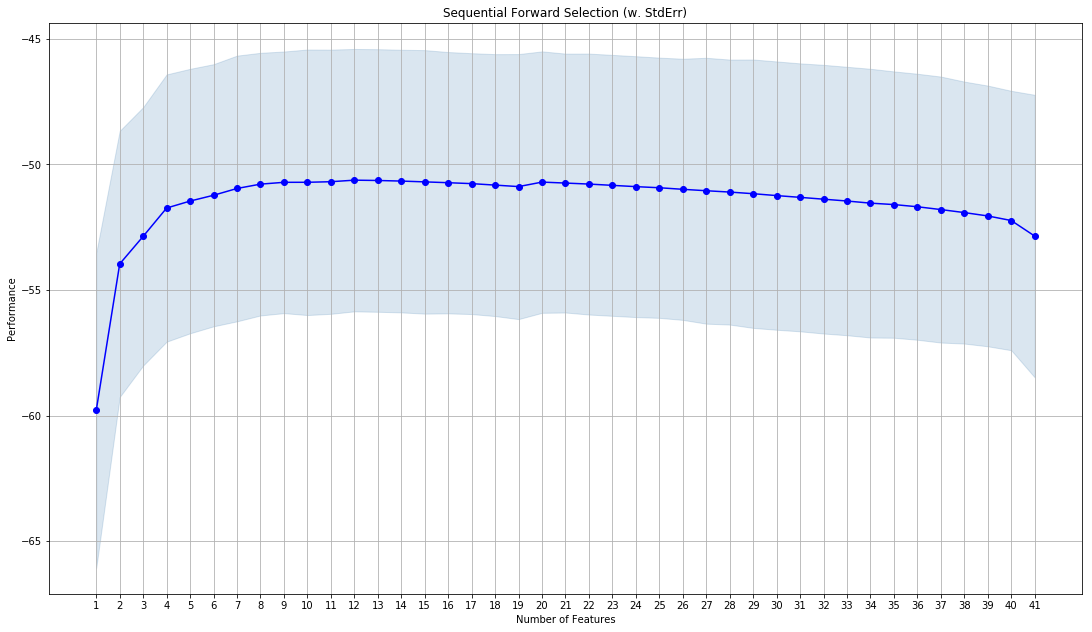

In [8]:
lr = linear_model.LinearRegression()
sfs_float = SFS(lr, 
           k_features=df_before_match_out_training.shape[1], 
           forward=True, 
           floating=True, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=10)
sfs_float = sfs_float.fit(df_before_match_out_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
fig = plot_sfs(sfs_float.get_metric_dict(), kind='std_err')
fig.set_size_inches(18.5, 10.5, forward=True)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [9]:
df_features_forward_float = pd.DataFrame.from_dict(sfs_float.get_metric_dict()).T
df_features_forward_float

,avg_score,ci_bound,cv_scores,feature_idx,std_dev,std_err
1,-59.7878,13.9674,"[-43.9259306582, -33.1537618454, -43.615903323...","(33,)",18.8059,6.26863
2,-53.9626,11.7963,"[-40.2304127945, -32.5914563379, -37.781174399...","(33, 9)",15.8828,5.29426
3,-52.8657,11.4534,"[-43.4440960432, -34.1341268419, -35.276969532...","(33, 20, 9)",15.4211,5.14035
4,-51.7393,11.8462,"[-44.9903564098, -33.1441690911, -32.657357956...","(33, 20, 9, 22)",15.9499,5.31663
5,-51.4616,11.7227,"[-43.9127609465, -33.4667522144, -32.299558186...","(33, 9, 20, 22, 27)",15.7836,5.2612
6,-51.2308,11.62,"[-42.5239202934, -33.3888484977, -32.836390317...","(33, 37, 9, 20, 22, 27)",15.6453,5.2151
7,-50.9608,11.7774,"[-42.8333463913, -33.7434498207, -33.433118579...","(33, 36, 37, 19, 20, 22, 27)",15.8573,5.28577
8,-50.7883,11.6426,"[-42.3757312454, -33.8862728388, -33.489588572...","(33, 36, 37, 10, 19, 20, 22, 27)",15.6758,5.22526
9,-50.7159,11.5973,"[-41.9782546574, -33.7729187666, -33.495495816...","(10, 19, 20, 22, 27, 33, 35, 36, 37)",15.6148,5.20493
10,-50.7145,11.7705,"[-41.5791137374, -33.3435483335, -33.396494922...","(10, 19, 20, 22, 27, 32, 33, 35, 36, 37)",15.848,5.28268


#### float solution: 

In [10]:
float_selected_columns_index=list()

selected_column_indice=df_features_forward_float[df_features_forward_float['avg_score'] == df_features_forward_float['avg_score'].max()]['feature_idx']
float_selected_columns_index=selected_column_indice.tolist()
float_selected_colname_list = df_before_match_out_training.columns[float_selected_columns_index].tolist()
print("Selected columns by float greedy sequential forward selection are: \n",float_selected_colname_list)

Selected columns by float greedy sequential forward selection are: 
 ['buildUpPlaySpeed_home', 'chanceCreationCrossing_home', 'buildUpPlayDribbling_home', 'buildUpPlayPassing_away', 'defenceAggression_away', 'buildUpPlayPassing_home', 'defenceTeamWidth_home', 'chanceCreationPassing_home', 'IWH', 'defenceTeamWidth_away', 'chanceCreationCrossing_away', 'WHA']


## Use the selected columns from both simple greedy and float greedy to use on the outter layer holdout validation

#### 1. Simple Greedy

In [11]:
df_before_match_greedy_training=df_before_match_out_training[greedy_selected_colname_list]
df_before_match_greedy_test=df_before_match_out_test[greedy_selected_colname_list]

lr_greedy = linear_model.LinearRegression()
lr_greedy.fit(df_before_match_greedy_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
before_match_greedy_pred = lr_greedy.predict(df_before_match_greedy_test.as_matrix())


print(r2_score(df_before_match_out_testtarget.tolist(), before_match_greedy_pred.tolist()))


0.339857262882


In [12]:
df_before_match_float_training=df_before_match_out_training[float_selected_colname_list]
df_before_match_float_test=df_before_match_out_test[float_selected_colname_list]

lr_greedy = linear_model.LinearRegression()
lr_greedy.fit(df_before_match_float_training.as_matrix(), df_before_match_out_trainingtarget.as_matrix())
before_match_float_pred = lr_greedy.predict(df_before_match_float_test.as_matrix())


print(r2_score(df_before_match_out_testtarget.tolist(), before_match_float_pred.tolist()))

0.344403348406


## ANN

In [16]:
df_before_match.head()

,WHD,buildUpPlayPositioningClass_away_isOrganised,chanceCreationShooting_away,chanceCreationPositioningClass_away_isOrganised,chanceCreationShooting_home,chanceCreationPassing_away,B365A,LBH,buildUpPlayPositioningClass_home_isOrganised,B365D,...,chanceCreationPassing_home,IWH,defenceTeamWidth_away,chanceCreationCrossing_away,WHA,defencePressure_away,LBD,BWD,B365H,possession_home
0,3.30,True,45,True,70,60,4.33,1.80,True,3.50,...,55,1.80,40,70,3.75,40,3.30,3.60,1.83,57
1,3.25,True,50,False,50,65,2.10,3.30,True,3.30,...,70,3.20,30,70,2.15,30,3.25,3.30,3.60,57
2,3.30,True,70,True,50,70,4.50,1.80,True,3.60,...,31,1.75,70,70,4.33,70,3.30,3.60,1.80,60
3,3.10,True,55,True,70,70,2.88,2.38,True,3.30,...,70,2.40,35,70,2.60,35,3.20,3.20,2.50,51
4,3.20,True,45,True,55,70,3.75,2.10,True,3.25,...,70,2.10,35,70,3.20,35,3.20,3.25,2.10,53


In [109]:
from sklearn.neural_network import MLPRegressor

X = df_before_match[before_match_attributes]

y = df_before_match['possession_home']
fnn = MLPRegressor(solver='sgd', alpha=1e-6,
                    hidden_layer_sizes=(2,),
                    random_state=1,
                    nesterovs_momentum=False,
                    early_stopping=False,)

model = fnn.fit(X, y)                         
print(model)
print(model.loss_curve_)
print(m.predict(X.iloc[100].values.reshape(1, -1)))

MLPRegressor(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=False, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
[247819.93799109655, 2227.2358893066898, 1994.0193872824968, 1618.8861669212145, 1272.5176316670772, 989.51732165517842, 769.71911654554299, 598.91503723796495, 468.81467121386686, 368.77356217694586, 292.64794749503039, 234.03320388819984, 189.47816699215809, 155.30494162705111, 129.28681200247442, 109.32904329599083, 94.067415606875699, 82.346525397361887, 73.455335138663813, 66.651200187629073, 61.456832081619147, 57.459311330473909, 54.422823189719985, 52.088341750422693, 50.319514175734383, 48.927236478408872, 47.906449813392257, 47.096901604760959, 46.527582717